In [17]:
import pandas as pd
import numpy as np
import umap.umap_ as umap
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv('../PS_20174392719_1491204439457_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


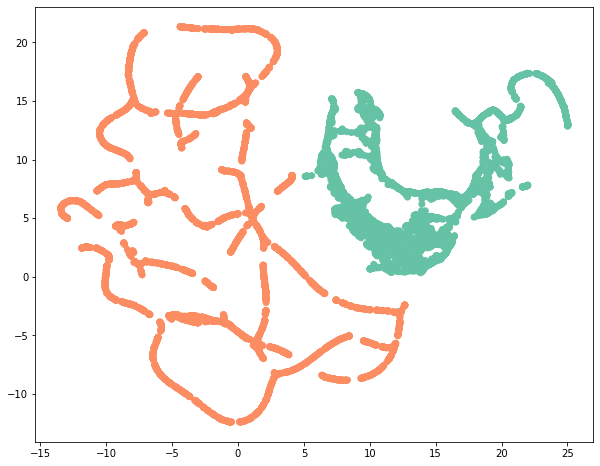

In [19]:
umap_sample = df.sample(n=5000, replace=False)
umap_sample_X = umap_sample[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
umap_sample_y = umap_sample[['isFraud']]

umap_resample_X, umap_resample_y = SMOTE().fit_resample(umap_sample_X, umap_sample_y)

fig = plt.figure(figsize=(10, 8))

reducer = umap.UMAP()
scaled_umap_sample = StandardScaler().fit_transform(umap_resample_X)
embedding = reducer.fit_transform(scaled_umap_sample)

plt.scatter(
    embedding[:, 0], 
    embedding[:, 1],
    c=[sns.color_palette('Set2')[x] for x in umap_resample_y.isFraud.map({0: 0, 1: 1})]
)
plt.show()
fig.savefig('umap.png', transparent=True)